<a href="https://colab.research.google.com/github/bognix/Machine-Learning-Playground/blob/main/digits_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [6]:
from fastbook import *

In [7]:
# this may not work in colab
from fastai.vision.widgets import *

In [8]:
path = untar_data(URLs.MNIST)
fns = get_image_files(path)

In [30]:
path.ls()

(#2) [Path('/Users/bognaflieger/.fastai/data/mnist_png/training'),Path('/Users/bognaflieger/.fastai/data/mnist_png/testing')]

## Check what's downloaded

In [9]:
(path/'training').ls()

(#10) [Path('/Users/bognaflieger/.fastai/data/mnist_png/training/9'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/0'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/7'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/6'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/1'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/8'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/4'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/3'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/2'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/5')]

In [10]:
path.ls()

(#2) [Path('/Users/bognaflieger/.fastai/data/mnist_png/training'),Path('/Users/bognaflieger/.fastai/data/mnist_png/testing')]

In [11]:
threes = (path/'training'/'3').ls().sorted()
# Image comes from Python Imaging Library (PIL)
Image.open(threes[0])

In [12]:
# Representation of each number
img_3_path = threes[1]
img_3 = Image.open(img_3_path)

# tensor is PyTorch tensor
tensor(img_3)[4:14,4:24]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0,   0,   0],
        [ 

In [13]:
# Create drawing based on the tensor
img_3_tensor = tensor(img_3)
df = pd.DataFrame(img_3_tensor[4:14,4:24])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0,0,0


In [15]:
# Create tensor for each digit
tensors = {}

training_paths = (path/'training').ls().sorted()

for p in training_paths:
    tensors[p.parts[-1]] = [tensor(Image.open(digit_path)) for digit_path in (path/p).ls().sorted()]

tensors['3'][1].shape

torch.Size([28, 28])

<Axes: >

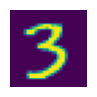

In [ ]:
show_image(tensors['3'][1])

In [16]:
# Stack tensors for each digit into single tensor
stacked = {}
for digit, t in tensors.items():
    stacked[digit] = torch.stack(t).float()/255


# <number_of_images, height, width>
# returns the length of each axis
stacked['3'].shape

torch.Size([6131, 28, 28])

In [ ]:
stacked['3'].ndim

3

In [ ]:
stacked['3'][0].shape

torch.Size([28, 28])

In [ ]:
stacked['3'][0].ndim

2

In [ ]:
stacked['3'][0][0].shape

torch.Size([28])

In [ ]:
stacked['3'][0][0].ndim

1

In [21]:
# calculate mean/average image for each digit
means = {}
for digit, stack in stacked.items():
    # mean from the dimiension 0 - mean for each image
    means[digit] = stack.mean(0)

means['3'][4:14,4:14]

tensor([[0.0014, 0.0058, 0.0137, 0.0301, 0.0554, 0.0903, 0.1372, 0.1836, 0.2213, 0.2465],
        [0.0089, 0.0278, 0.0611, 0.1127, 0.1869, 0.2802, 0.3830, 0.4802, 0.5588, 0.6132],
        [0.0245, 0.0599, 0.1204, 0.2075, 0.3194, 0.4355, 0.5445, 0.6276, 0.6850, 0.7239],
        [0.0379, 0.0829, 0.1538, 0.2416, 0.3377, 0.4268, 0.4916, 0.5284, 0.5447, 0.5588],
        [0.0409, 0.0788, 0.1344, 0.1946, 0.2507, 0.2949, 0.3169, 0.3175, 0.3113, 0.3218],
        [0.0294, 0.0550, 0.0895, 0.1195, 0.1417, 0.1558, 0.1617, 0.1615, 0.1696, 0.2058],
        [0.0168, 0.0294, 0.0451, 0.0579, 0.0681, 0.0782, 0.0952, 0.1253, 0.1803, 0.2742],
        [0.0088, 0.0145, 0.0207, 0.0291, 0.0443, 0.0778, 0.1396, 0.2331, 0.3551, 0.4887],
        [0.0041, 0.0082, 0.0132, 0.0278, 0.0667, 0.1486, 0.2776, 0.4349, 0.5836, 0.7028],
        [0.0026, 0.0054, 0.0141, 0.0392, 0.1050, 0.2264, 0.3944, 0.5657, 0.6985, 0.7672]])

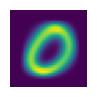

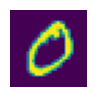

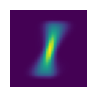

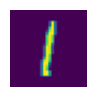

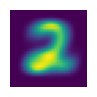

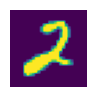

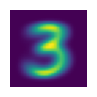

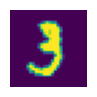

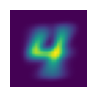

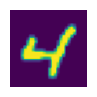

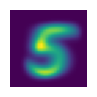

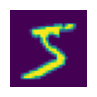

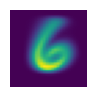

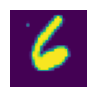

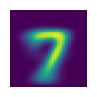

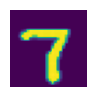

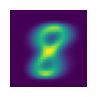

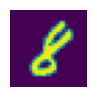

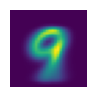

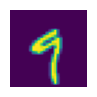

In [ ]:
for digit, m in means.items():
    show_image(means[digit])
    show_image(stacked[digit][0])

In [28]:
# Compute how different first image of "1" is different from the average image of each digit
a_one = stacked['1'][0]
for digit in means.keys():
    mean_digit = means[digit]
    dist_abs = (a_one - mean_digit).abs().mean()
    dist_sqr = ((a_one - mean_digit)**2).mean().sqrt()

    print(digit, dist_abs, dist_sqr)

print('---------------')

# same computation using PyTorch build-in functions
a_one = stacked['1'][0]
for digit in means.keys():
    mean_digit = means[digit]
    dist_abs = F.l1_loss(a_one.float(), mean_digit)
    dist_sqr = F.mse_loss(a_one.float(), mean_digit).sqrt()

    print(digit, dist_abs, dist_sqr)

0 tensor(0.1806) tensor(0.3065)
1 tensor(0.0530) tensor(0.1335)
2 tensor(0.1449) tensor(0.2479)
3 tensor(0.1360) tensor(0.2435)
4 tensor(0.1393) tensor(0.2620)
5 tensor(0.1288) tensor(0.2256)
6 tensor(0.1332) tensor(0.2471)
7 tensor(0.1242) tensor(0.2451)
8 tensor(0.1341) tensor(0.2369)
9 tensor(0.1291) tensor(0.2486)
---------------
0 tensor(0.1806) tensor(0.3065)
1 tensor(0.0530) tensor(0.1335)
2 tensor(0.1449) tensor(0.2479)
3 tensor(0.1360) tensor(0.2435)
4 tensor(0.1393) tensor(0.2620)
5 tensor(0.1288) tensor(0.2256)
6 tensor(0.1332) tensor(0.2471)
7 tensor(0.1242) tensor(0.2451)
8 tensor(0.1341) tensor(0.2369)
9 tensor(0.1291) tensor(0.2486)


In [34]:
# Create a validation set

valid_digits = {}

valid_paths = (path/'testing').ls().sorted()

for p in valid_paths:
    valid_digits[p.parts[-1]] = torch.stack([tensor(Image.open(digit_path)) for digit_path in (path/p).ls().sorted()])
    valid_digits[p.parts[-1]] = valid_digits[p.parts[-1]].float()/255

for d in valid_digits.keys():
    print(d, valid_digits[d].shape)

0 torch.Size([980, 28, 28])
1 torch.Size([1135, 28, 28])
2 torch.Size([1032, 28, 28])
3 torch.Size([1010, 28, 28])
4 torch.Size([982, 28, 28])
5 torch.Size([892, 28, 28])
6 torch.Size([958, 28, 28])
7 torch.Size([1028, 28, 28])
8 torch.Size([974, 28, 28])
9 torch.Size([1009, 28, 28])


In [35]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))

In [111]:
def get_prediction(x):
    result = {}
    avg = {}
    for d in means.keys():
        avg[d] = mnist_distance(x, means[d]).mean()
        result[d] = mnist_distance(x, means[d]) <= avg[d]
    
    return result

In [114]:
predictions = get_prediction(valid_digits['8'])

In [117]:
accuracy = {}
for d in predictions.keys():
    pred_for_digit = predictions[d]
    print(d, pred_for_digit.float().mean())

0 tensor(0.5534)
1 tensor(0.5811)
2 tensor(0.5832)
3 tensor(0.5595)
4 tensor(0.5647)
5 tensor(0.5832)
6 tensor(0.5503)
7 tensor(0.5791)
8 tensor(0.5934)
9 tensor(0.5883)
